# PyLTR deltaBTimeSeries (Parallel) Demonstration
------------------------------

In [1]:
# this SHOULD work inside JupyterLab if the Python environment is correct
#%matplotlib widget

# this does NOT work inside JupyterLab, but DOES in a Notebook (less insecure)
%matplotlib notebook

# this should work anywhere
# %matplotlib inline

In [2]:
# import built-in Python libraries

# import common Python packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [3]:
# import home-built packages
import pyLTR

In [4]:
# set up Cartopy to plot nice maps
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

scale = '50m'
coast = cfeature.NaturalEarthFeature(
        category='physical',
        name='coastline',
        scale=scale,
        edgecolor='k',
        facecolor='none')
land = cfeature.NaturalEarthFeature(
        category='physical',
        name='land', 
        scale=scale,
        edgecolor='face',
        facecolor=cfeature.COLORS['land'])
# land = cfeature.LAND
ocean = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale=scale,
        facecolor=np.sqrt(cfeature.COLORS['water']))
rivers = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale=scale,
        facecolor=cfeature.COLORS['water'],
        edgecolor='face')
lakes = cfeature.NaturalEarthFeature(
        category='physical',
        name='lakes',
        scale=scale,
        facecolor=cfeature.COLORS['water'],
        edgecolor='face')
states = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale=scale,
        facecolor='none',
        edgecolor='k')
countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale=scale,
        facecolor='none',
        edgecolor='k')

def symlog(x):
    """Returns the symmetric log10 value, allowing for negatives"""
    if np.any(np.abs(x) <= 1):
        print("Warning: log values between -1 and 1 flip the sign.")
    return np.sign(x) * np.log10(np.abs(x))

# Create the colormap RGB scale
# cmap_name = 'BinaryRedGreen'
cm_RedGreen = mpl.colors.LinearSegmentedColormap.from_list('BinaryRedGreen',
                                                           [(1, 0, 0), (0, 1, 0)], N=2)

def log_scale_vectors(x, y, scale=np.log10):
    mag = np.sqrt(x*x + y*y)
    angle = np.arctan2(y, x)
    
    mag_scaled = scale(mag)
    mag_scaled[mag_scaled < 0] = 0
    return (mag_scaled*np.cos(angle), mag_scaled*np.sin(angle))

## Runtime Configuration

In [5]:
# set configuration parameters

# folder with outputs
# NOTE: If using a relative path, this path must be wrt where the IPython
#       kernel is running. This may be different for a given cell in this
#       notebook and the kernel used by IPyParallel if the user is not
#       careful. It is probably better to just use absolute paths.
#
path = '/glade/scratch/jrigler/LTR/2015SP/'
#path = '/Users/erigler/Devel/Python/pyLTR/examples/data/models/2015StP/'

# prefix for output files
#run = '2015Mar17'
run = '2015SP'

# start time and endtime for processing
t0 = datetime.datetime(2015,3,17,0,0,0)
t1 = datetime.datetime(2015,3,17,17,0,0)

# output folder (this must be relative to path)
outPath = "./"


In [6]:
# Define observatory list 
# (these are real locations for synthetic observatories)

obs = {}

obs['BOU'] = {'name':'Boulder',             'geoLatitude':40.14, 'geoLongitude':254.76}
obs['BRW'] = {'name':'Barrow',              'geoLatitude':71.32, 'geoLongitude':203.38}
obs['BSL'] = {'name':'Stennis Space Center','geoLatitude':30.35, 'geoLongitude':270.37}

obs['CMO'] = {'name':'College',             'geoLatitude':64.87, 'geoLongitude':212.14}
obs['DED'] = {'name':'Deadhorse',           'geoLatitude':70.36, 'geoLongitude':211.21}
obs['FRD'] = {'name':'Fredricksburg',       'geoLatitude':38.20, 'geoLongitude':282.63}

obs['FRN'] = {'name':'Fresno',              'geoLatitude':37.09, 'geoLongitude':240.28}
obs['GUA'] = {'name':'Guam',                'geoLatitude':13.59, 'geoLongitude':144.87}
obs['HON'] = {'name':'Honolulu',            'geoLatitude':21.32, 'geoLongitude':202.00}

obs['NEW'] = {'name':'Newport',             'geoLatitude':48.27, 'geoLongitude':242.88}
obs['SHU'] = {'name':'Shumagin',            'geoLatitude':55.35, 'geoLongitude':199.54}
obs['SIT'] = {'name':'Sitka',               'geoLatitude':57.06, 'geoLongitude':224.67}

obs['SJG'] = {'name':'San Juan',            'geoLatitude':18.11, 'geoLongitude':293.85}
obs['TUC'] = {'name':'Tucson',              'geoLatitude':32.17, 'geoLongitude':249.27}


obs['BLC'] = {'name':'Baker Lake',          'geoLatitude':64.30, 'geoLongitude':264.00}
obs['BRD'] = {'name':'Brandon',             'geoLatitude':49.60, 'geoLongitude':262.90}
obs['HAD'] = {'name':'Hartland',            'geoLatitude':51.00, 'geoLongitude':355.00}

obs['HER'] = {'name':'Hermanus',            'geoLatitude':-34.40, 'geoLongitude':19.20}
obs['IQA'] = {'name':'Iqaluit',             'geoLatitude':63.80, 'geoLongitude':291.50}
obs['KAK'] = {'name':'Kakioka',             'geoLatitude':36.20, 'geoLongitude':140.20}

obs['MEA'] = {'name':'Meanook',             'geoLatitude':54.60, 'geoLongitude':246.70}
obs['OTT'] = {'name':'Ottowa',              'geoLatitude':45.40, 'geoLongitude':284.50}
obs['RES'] = {'name':'Resolute Bay',        'geoLatitude':74.70, 'geoLongitude':265.10}

obs['STJ'] = {'name':'Saint John\'s',       'geoLatitude':47.60, 'geoLongitude':307.30}
obs['VIC'] = {'name':'Victoria',            'geoLatitude':48.60, 'geoLongitude':236.60}
obs['YKC'] = {'name':'Yellow Knife',        'geoLatitude':62.40, 'geoLongitude':245.50}

# create list of lists of observatory coordinates to pass to detlaBTimeSeries.py
obsList = [[elem[1]['geoLongitude']*np.pi/180,
           (90-elem[1]['geoLatitude'])*np.pi/180,
           6378000,
           elem[0]]
           for elem in obs.items()]

In [7]:
# define list of North American gridded locations 
# at which to calculate ground deltaB
lons, lats = np.meshgrid(np.linspace(-170,-30,71), np.linspace(80,20,31) )
gridList = [[lons.flat[i] * np.pi/180,
             (90 - lats.flat[i]) * np.pi/180,
             6378000]
             for i in range(lons.size)]

In [8]:
# define list of Northern hemisphere gridded locations 
# at which to calculate ground deltaB
lons, lats = np.meshgrid(np.mod(np.linspace(0,360,181)[:-1], 360), np.linspace(90,0,46) )
gridList = [[lons.flat[i] * np.pi/180,
             (90 - lats.flat[i]) * np.pi/180,
             6378000]
             for i in range(lons.size)]

## (IPy)Parallel Processing

Break up the time series into time chunks, then use IPyParallel to run deltaBTimeSeries in an "embarassingly parallel" mode.

> Note  1: to use ipyparallel, we must set up parallel engines *before* starting IPython/
>          Notebook; also, since it is not easy to guarantee two logins on the same NCAR
>          super node, these engines must be run (and optionally logged) in the background:
>
> `ipcluster start -n 4 > ipyparallel_20170419.log 2>&1 &`
>
> (with modern (2019) Jupyter Notebooks, and with ipyparallel package available, it
>  seems like one can do this via the `IPython Clusters` tab on Notebook's dashboard)

 ***Generate deltaBTimeSeries at obsList locations***

In [ ]:
import ipyparallel
import warnings
try:
    # initialization ipyparallel client and create "direct view"
    client = ipyparallel.Client()
    dview = client[:]

    # generate a list of datetimes to process
    tAll = [t0 + datetime.timedelta(minutes=delta_min) 
            for delta_min in range(int((t1 - t0).total_seconds() // 60 + 1))]

    # Break up time interval into chunks for parallel processing
    nprocs = len(dview)
    t0s, t1s = np.transpose([[arr[0], arr[-1]]
                             for arr in np.array_split(tAll, nprocs)])

    # construct list of argument dictionaries
    args = [{'path':path, 
             'run':run,
             't0':t0s[i],
             't1':t1s[i],
             'obsList':obsList,
             'geoGrid':True,
             'mix':True,
             'tie':True,
             'lfm':True,
             'mix_bs_mx':True,
             'tie_bs_mx':True,
             'ignoreBinary':False,
             'binaryType':'pkl',
             'outDirName':outPath + '/obs'}
            for i in range(len(t0s))]

    # Use deltaBTimeSeries to generate synthetic geomagnetic observations
    def mappable_dBextract(kwargs):
        """mappable wrapper to unpack kwargs and pass to dBextract"""
        return pyLTR.Tools.deltaBTimeSeries.extractQuantities(**kwargs)

    # Use ipyparallel %magic function to import pyLTR into the engines
    %px import pyLTR

    # run in parallel
    results = dview.map_sync(mappable_dBextract, args)

except ipyparallel.error.TimeoutError:
    warnings.warn("\n  No IPython parallel computing clusters enabled...nothing processed!")

 ***Generate deltaBTimeSeries at gridList locations***

In [90]:
import ipyparallel
import warnings

try:
    # initialization ipyparallel client and create "direct view"
    client = ipyparallel.Client()
    dview = client[:]

    # generate a list of datetimes to process
    tAll = [t0 + datetime.timedelta(minutes=delta_min) 
            for delta_min in range(int((t1 - t0).total_seconds() // 60 + 1))]

    # Break up time interval into chunks for parallel processing
    nprocs = len(dview)
    t0s, t1s = np.transpose([[arr[0], arr[-1]]
                             for arr in np.array_split(tAll, nprocs)])

    # construct list of argument dictionaries
    args = [{'path':path, 
             'run':run,
             't0':t0s[i],
             't1':t1s[i],
             'obsList':gridList,
             'geoGrid':True,
             'mix':True,
             'tie':True,
             'lfm':True,
             'mix_bs_mx':True,
             'tie_bs_mx':True,
             'ignoreBinary':False,
             'binaryType':'pkl',
             'outDirName':outPath + '/grid'}
            for i in range(len(t0s))]

    # Use deltaBTimeSeries to generate synthetic geomagnetic observations
    def mappable_dBextract(kwargs):
        """mappable wrapper to unpack kwargs and pass to dBextract"""
        return pyLTR.Tools.deltaBTimeSeries.extractQuantities(**kwargs)

    # Use ipyparallel %magic function to import pyLTR into the engines
    %px import pyLTR

    # run in parallel
    results = dview.map_sync(mappable_dBextract, args)

except ipyparallel.error.TimeoutError:
    warnings.warn("\n  No IPython parallel computing clusters enabled...nothing processed!")

/Users/erigler/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: 
  No IPython parallel computing clusters enabled...nothing processed!


# Serial Processing

Ideally, this block would simply collate the IPyParallel results chronologically, which should be a fairly trivial operation. If the IPyParallel block failed for any reason, deltaBTimeSeries will be run in serial.

In [9]:
# run deltaBTimeSeries on obsList again to read in all the pkl files generated
# previously and collate them chronologically
dBTSextract = pyLTR.Tools.deltaBTimeSeries.extractQuantities
dBobs = dBTSextract(**{
    'path':path, 
    'run':run,
    't0':t0,
    't1':t1,
    'obsList':obsList,
    'geoGrid':True,
    'mix':True,
    'tie':True,
    'lfm':True,
    'mix_bs_mx':True,
    'tie_bs_mx':True,
    'ignoreBinary':False,
    'binaryType':'pkl',
    'outDirName':outPath + '/obs'
})


Extracting quantities for 361 time steps.
Likely not a run from terminal so no progress bar

Pre-compute Northern MIX DALECS
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
ionospheric currents
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
field-aligned currents
...done after 96.026776 seconds

Pre-compute Southern MIX DALECS
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
ionospheric currents
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
field-aligned currents
...done after 95.106957 seconds

Pre-compute TIEGCM DALECS
Initializing  7760  type1 Bostrom loops
Initializing  7760  type2 Bostrom loops
ionospheric currents
Initializing  7760  type1 Bostrom loops
Initializing  7760  type2 Bostrom loops
field-aligned currents
...done after 32.873013 seconds

Pre-compute LFM grid and volumes
...done after 0.446633 seconds

Starting main loop
No valid binar

...done after 0.002171 seconds

LFM
...done after 1.158823 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T03-30-00Z...

MIX

North...
...done after 0.006216 seconds

South...
...done after 0.005898 seconds

TIEGCM
...done after 0.002175 seconds

LFM
...done after 1.159590 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T03-31-00Z...

MIX

North...
...done after 0.006239 seconds

South...
...done after 0.005859 seconds

TIEGCM
...done after 0.002157 seconds

LFM
...done after 1.187008 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T03-32-00Z...

MIX

North...
...done after 0.006180 seconds

South...
...done after 0.005868 seconds

TIEGCM
...done after 0.002174 seconds

LFM
...done after 1.137298 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T03-33-00Z...

MIX

North...
...done after 0.006210 seconds

South...
...done after 0.005859 seconds

TIEGCM
...done after 0.002180 seconds

LFM
...done 


North...
...done after 0.006280 seconds

South...
...done after 0.005865 seconds

TIEGCM
...done after 0.002168 seconds

LFM
...done after 1.164015 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-05-00Z...

MIX

North...
...done after 0.006241 seconds

South...
...done after 0.005873 seconds

TIEGCM
...done after 0.002175 seconds

LFM
...done after 1.197151 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-06-00Z...

MIX

North...
...done after 0.006230 seconds

South...
...done after 0.005874 seconds

TIEGCM
...done after 0.002168 seconds

LFM
...done after 1.131275 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-07-00Z...

MIX

North...
...done after 0.006211 seconds

South...
...done after 0.005883 seconds

TIEGCM
...done after 0.002220 seconds

LFM
...done after 1.171485 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-08-00Z...

MIX

North...
...done after 0.006194 seconds

So

...done after 0.002765 seconds

LFM
...done after 1.253433 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-39-00Z...

MIX

North...
...done after 0.007961 seconds

South...
...done after 0.007536 seconds

TIEGCM
...done after 0.002780 seconds

LFM
...done after 1.263851 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-40-00Z...

MIX

North...
...done after 0.007683 seconds

South...
...done after 0.007528 seconds

TIEGCM
...done after 0.002705 seconds

LFM
...done after 1.264676 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-41-00Z...

MIX

North...
...done after 0.007675 seconds

South...
...done after 0.007513 seconds

TIEGCM
...done after 0.002736 seconds

LFM
...done after 1.325635 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T04-42-00Z...

MIX

North...
...done after 0.007799 seconds

South...
...done after 0.007502 seconds

TIEGCM
...done after 0.002745 seconds

LFM
...done 


North...
...done after 0.007957 seconds

South...
...done after 0.007570 seconds

TIEGCM
...done after 0.002739 seconds

LFM
...done after 1.283337 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-14-00Z...

MIX

North...
...done after 0.007687 seconds

South...
...done after 0.007531 seconds

TIEGCM
...done after 0.002746 seconds

LFM
...done after 1.259652 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-15-00Z...

MIX

North...
...done after 0.008065 seconds

South...
...done after 0.007397 seconds

TIEGCM
...done after 0.002747 seconds

LFM
...done after 1.266871 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-16-00Z...

MIX

North...
...done after 0.007696 seconds

South...
...done after 0.007522 seconds

TIEGCM
...done after 0.002763 seconds

LFM
...done after 1.202890 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-17-00Z...

MIX

North...
...done after 0.007972 seconds

So

...done after 0.002745 seconds

LFM
...done after 1.259513 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-48-00Z...

MIX

North...
...done after 0.007812 seconds

South...
...done after 0.007569 seconds

TIEGCM
...done after 0.002719 seconds

LFM
...done after 1.348284 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-49-00Z...

MIX

North...
...done after 0.007845 seconds

South...
...done after 0.007584 seconds

TIEGCM
...done after 0.002714 seconds

LFM
...done after 1.278937 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-50-00Z...

MIX

North...
...done after 0.007939 seconds

South...
...done after 0.007636 seconds

TIEGCM
...done after 0.002749 seconds

LFM
...done after 1.294384 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T05-51-00Z...

MIX

North...
...done after 0.007906 seconds

South...
...done after 0.007598 seconds

TIEGCM
...done after 0.002725 seconds

LFM
...done 


North...
...done after 0.007894 seconds

South...
...done after 0.007602 seconds

TIEGCM
...done after 0.002734 seconds

LFM
...done after 1.241369 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-23-00Z...

MIX

North...
...done after 0.007895 seconds

South...
...done after 0.007589 seconds

TIEGCM
...done after 0.002723 seconds

LFM
...done after 1.294178 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-24-00Z...

MIX

North...
...done after 0.007861 seconds

South...
...done after 0.007571 seconds

TIEGCM
...done after 0.002743 seconds

LFM
...done after 1.267759 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-25-00Z...

MIX

North...
...done after 0.007870 seconds

South...
...done after 0.007648 seconds

TIEGCM
...done after 0.002757 seconds

LFM
...done after 1.336384 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-26-00Z...

MIX

North...
...done after 0.007839 seconds

So

...done after 0.002739 seconds

LFM
...done after 1.224754 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-57-00Z...

MIX

North...
...done after 0.007879 seconds

South...
...done after 0.007627 seconds

TIEGCM
...done after 0.002711 seconds

LFM
...done after 1.269094 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-58-00Z...

MIX

North...
...done after 0.007859 seconds

South...
...done after 0.007600 seconds

TIEGCM
...done after 0.002749 seconds

LFM
...done after 1.267880 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T06-59-00Z...

MIX

North...
...done after 0.007870 seconds

South...
...done after 0.007611 seconds

TIEGCM
...done after 0.002751 seconds

LFM
...done after 1.393343 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T07-00-00Z...

MIX

North...
...done after 0.007889 seconds

South...
...done after 0.007608 seconds

TIEGCM
...done after 0.002758 seconds

LFM
...done 


North...
...done after 0.006245 seconds

South...
...done after 0.005646 seconds

TIEGCM
...done after 0.002226 seconds

LFM
...done after 1.108168 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T07-32-00Z...

MIX

North...
...done after 0.005998 seconds

South...
...done after 0.005698 seconds

TIEGCM
...done after 0.002187 seconds

LFM
...done after 1.426248 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T07-33-00Z...

MIX

North...
...done after 0.005995 seconds

South...
...done after 0.005754 seconds

TIEGCM
...done after 0.002153 seconds

LFM
...done after 1.262337 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T07-34-00Z...

MIX

North...
...done after 0.006282 seconds

South...
...done after 0.005659 seconds

TIEGCM
...done after 0.002192 seconds

LFM
...done after 1.232524 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T07-35-00Z...

MIX

North...
...done after 0.006298 seconds

So

...done after 0.002724 seconds

LFM
...done after 1.287537 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-06-00Z...

MIX

North...
...done after 0.007937 seconds

South...
...done after 0.007507 seconds

TIEGCM
...done after 0.002675 seconds

LFM
...done after 1.225367 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-07-00Z...

MIX

North...
...done after 0.007886 seconds

South...
...done after 0.007645 seconds

TIEGCM
...done after 0.002677 seconds

LFM
...done after 1.331221 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-08-00Z...

MIX

North...
...done after 0.007931 seconds

South...
...done after 0.007726 seconds

TIEGCM
...done after 0.002763 seconds

LFM
...done after 1.275519 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-09-00Z...

MIX

North...
...done after 0.008091 seconds

South...
...done after 0.007822 seconds

TIEGCM
...done after 0.002696 seconds

LFM
...done 


North...
...done after 0.007831 seconds

South...
...done after 0.007660 seconds

TIEGCM
...done after 0.002736 seconds

LFM
...done after 1.174523 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-41-00Z...

MIX

North...
...done after 0.007857 seconds

South...
...done after 0.007746 seconds

TIEGCM
...done after 0.002675 seconds

LFM
...done after 1.348528 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-42-00Z...

MIX

North...
...done after 0.007995 seconds

South...
...done after 0.007653 seconds

TIEGCM
...done after 0.002699 seconds

LFM
...done after 1.230169 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-43-00Z...

MIX

North...
...done after 0.007836 seconds

South...
...done after 0.007621 seconds

TIEGCM
...done after 0.002721 seconds

LFM
...done after 1.305174 seconds
No valid binary file found, recalculating obs_deltaB_2015-03-17T08-44-00Z...

MIX

North...
...done after 0.007801 seconds

So

<IPython.core.display.Javascript object>


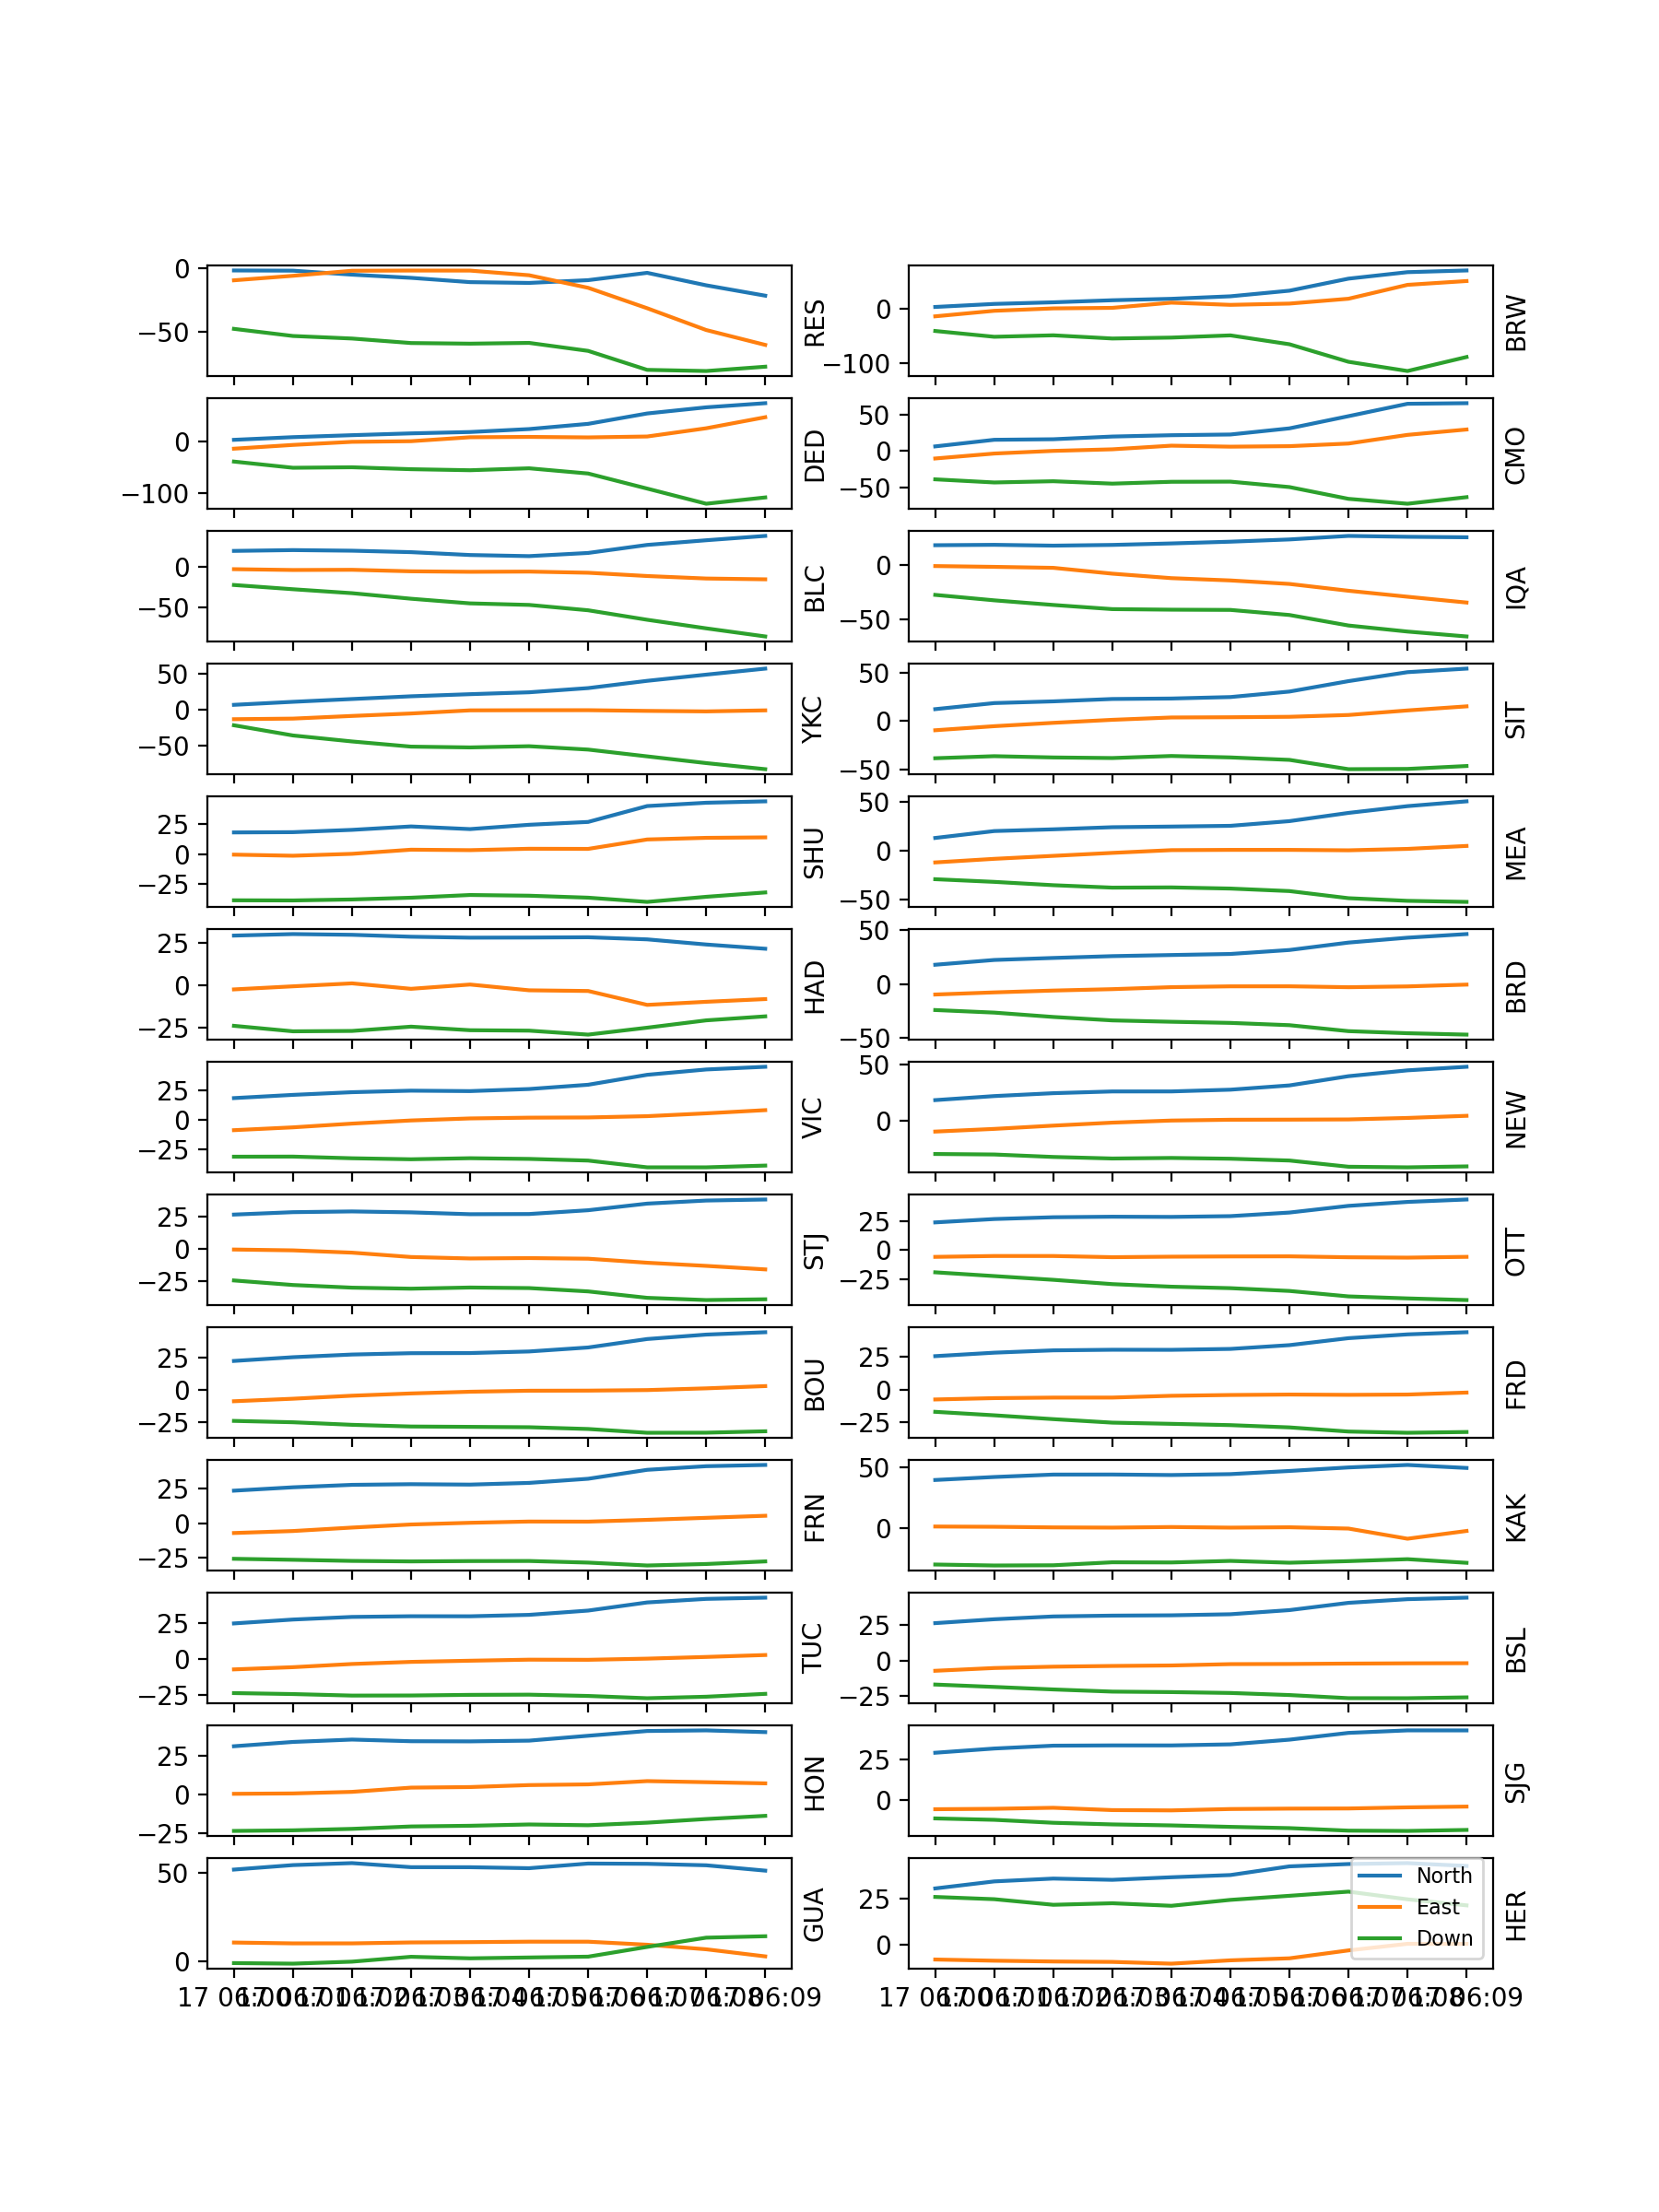

In [10]:
# Plot the time series
plt.figure(figsize=(9,12))
for i,obs in enumerate(dBobs):
    plt.subplot(len(dBobs) / 2, 2, i+1)
    plt.plot(obs['dBTot']['datetime']['data'],
             obs['dBTot']['North']['data'])
    plt.plot(obs['dBTot']['datetime']['data'],
             obs['dBTot']['East']['data'])
    plt.plot(obs['dBTot']['datetime']['data'],
             obs['dBTot']['Down']['data'])
    plt.ylabel(obs['dBTot']['obs']['name'])
    plt.gca().yaxis.set_label_position('right')
    plt.gca().set_xticklabels('')
    
    if i+1 == len(dBobs) or i+1 == len(dBobs)-1:
        plt.gca().clear()
        plt.plot(obs['dBTot']['datetime']['data'],
                 obs['dBTot']['North']['data'])
        plt.plot(obs['dBTot']['datetime']['data'],
                 obs['dBTot']['East']['data'])
        plt.plot(obs['dBTot']['datetime']['data'],
                 obs['dBTot']['Down']['data'])
        plt.ylabel(obs['dBTot']['obs']['name'])
        plt.gca().yaxis.set_label_position('right')
        
    if i+1 == len(dBobs):
        plt.legend(('North','East','Down'), loc='lower right', prop={'size': 8})
        

In [ ]:
# run deltaBTimeSeries on gridList again to read in all the pkl files generated
# previously and collate them chronologically
dBTSextract = pyLTR.Tools.deltaBTimeSeries.extractQuantities
dBgrid = dBTSextract(**{
    'path':path, 
    'run':run,
    't0':t0,
    't1':t1,
    'obsList':gridList,
    'geoGrid':True,
    'mix':True,
    'tie':True,
    'lfm':True,
    'mix_bs_mx':True,
    'tie_bs_mx':True,
    'ignoreBinary':False,
    'binaryType':'pkl',
    'outDirName':outPath + '/grid'
})

Extracting quantities for 1021 time steps.
Likely not a run from terminal so no progress bar

Pre-compute Northern MIX DALECS
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
ionospheric currents
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
field-aligned currents
...done after 92.905724 seconds

Pre-compute Southern MIX DALECS
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
ionospheric currents
Initializing  23040  type1 Bostrom loops
Initializing  23040  type2 Bostrom loops
field-aligned currents
...done after 93.399039 seconds

Pre-compute TIEGCM DALECS
Initializing  7760  type1 Bostrom loops
Initializing  7760  type2 Bostrom loops
ionospheric currents
Initializing  7760  type1 Bostrom loops
Initializing  7760  type2 Bostrom loops
field-aligned currents
...done after 31.989828 seconds

Pre-compute LFM grid and volumes
...done after 0.280914 seconds

Starting main loop
No valid bina

<IPython.core.display.Javascript object>


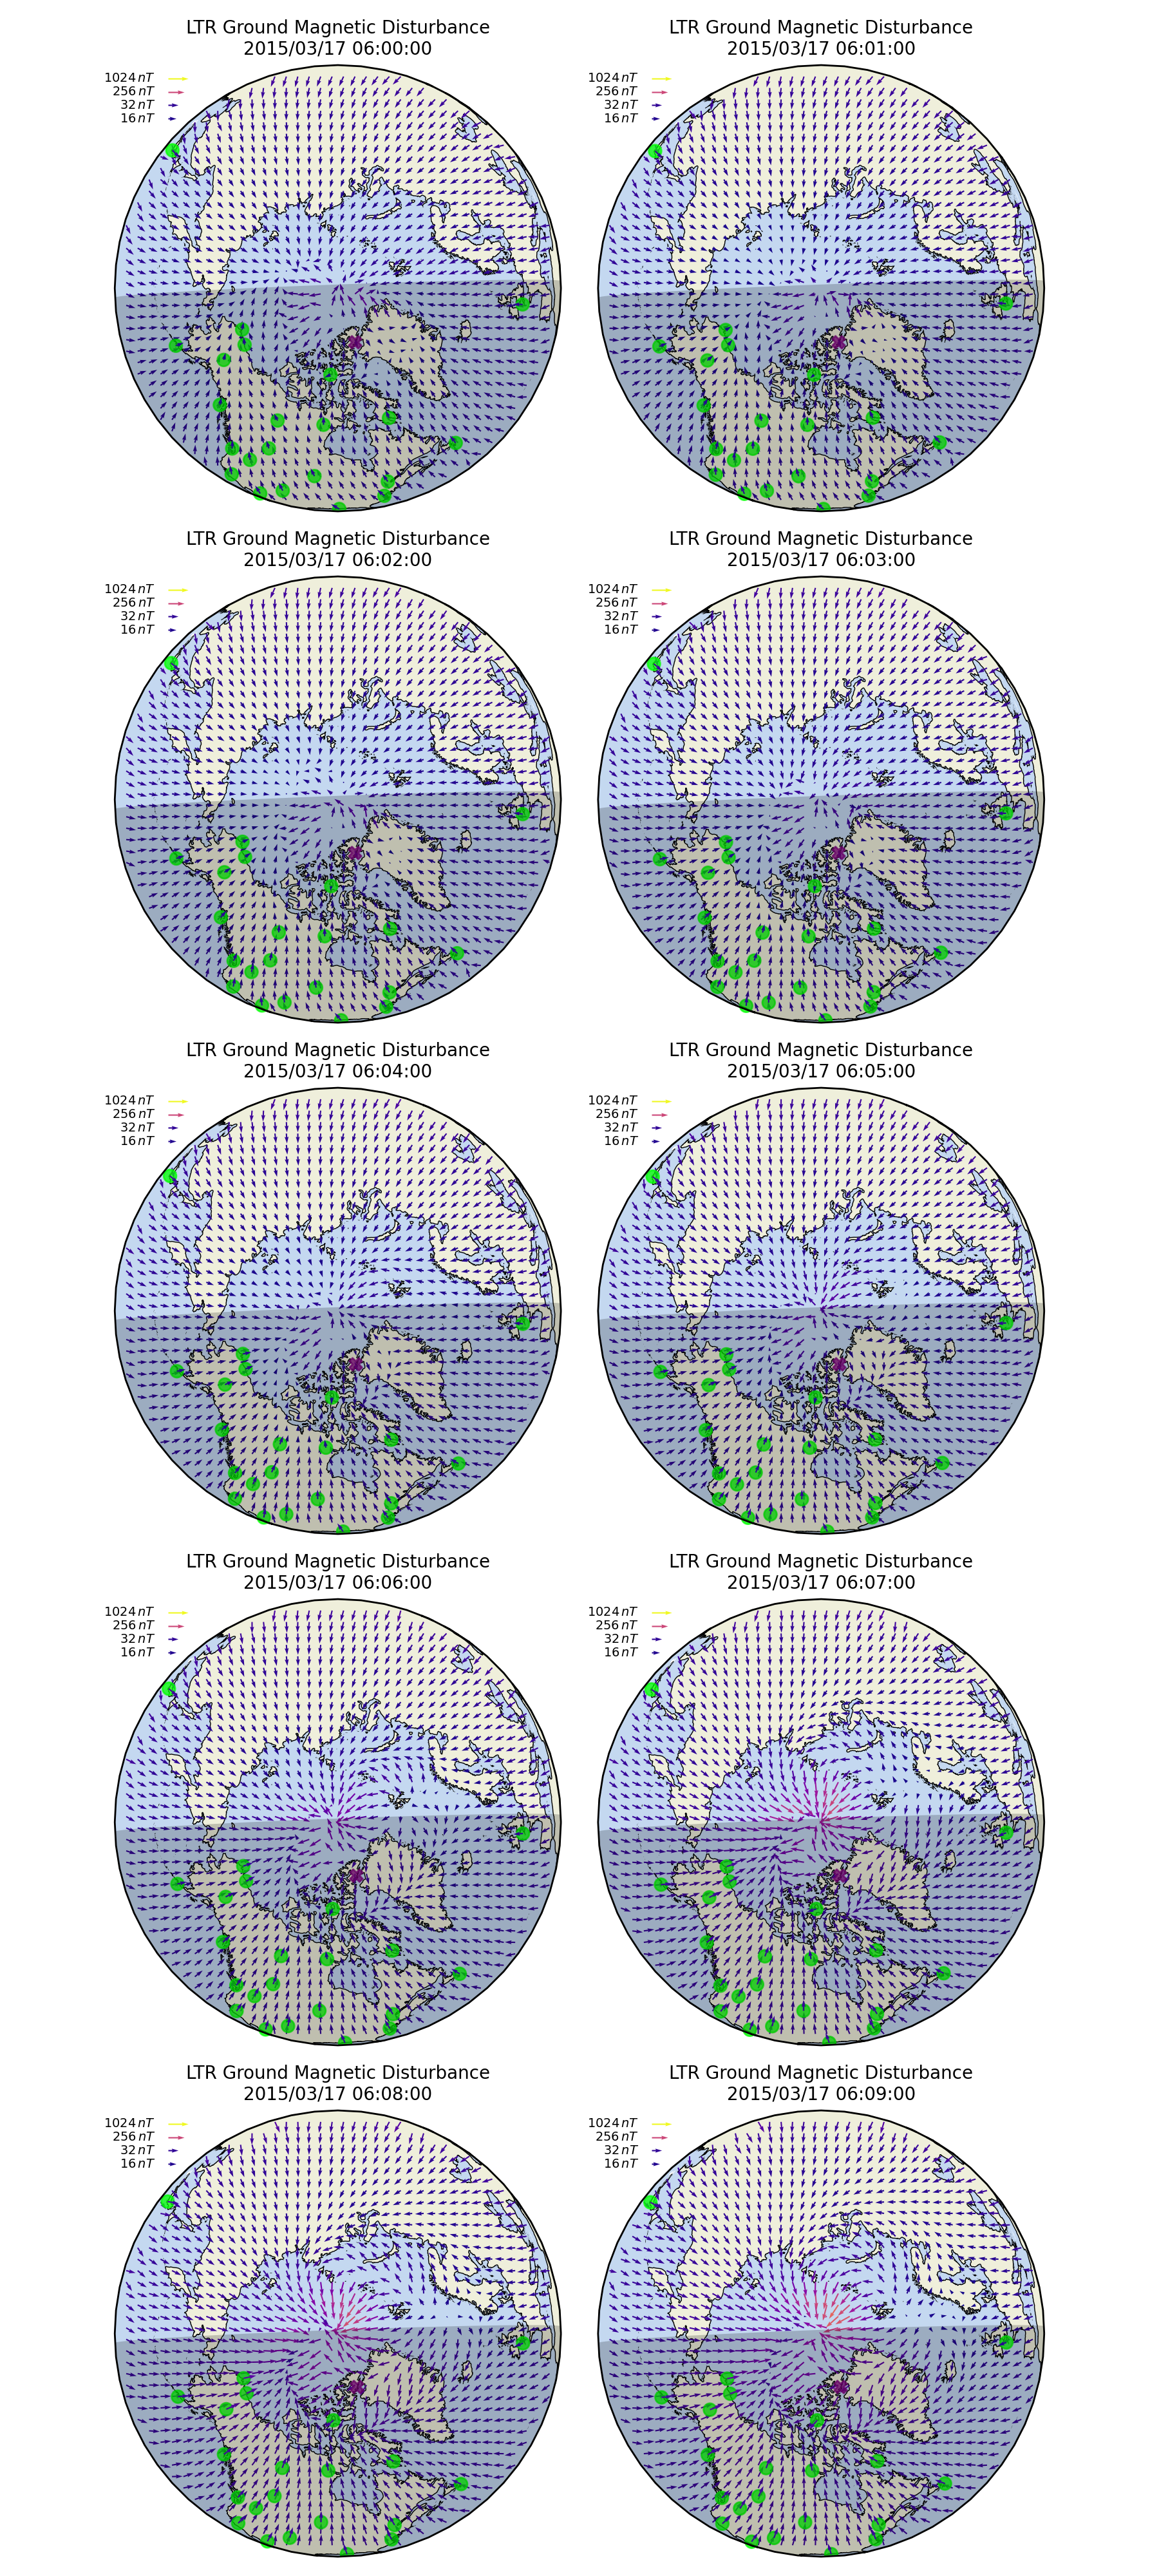

In [12]:
# plot some snapshots of gridded deltaB

from cartopy.feature.nightshade import Nightshade

r = 5 # rows 
c = 2 # columns
n = len(dBobs[0]['dBTot']['datetime']['data'])
step = int(np.ceil(n / (r * c)))
fig = plt.figure(figsize=(9, r*4), tight_layout=True)
axs = [] # empty list to hold axes created inside loop

# loop over time step index
for t in range(n)[0::step]:

    utc = dBobs[0]['dBTot']['datetime']['data'][t]
    utc_seconds = (utc - utc.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    utc_angle = (utc_seconds/86400. * 360)

    # 
    # map config
    #
    central_lat = 90
    central_lon = -utc_angle # forces sun/noon to top
    # projection = ccrs.Orthographic(central_latitude=central_lat, central_longitude=central_lon)
    projection = ccrs.NearsidePerspective(central_latitude=central_lat, 
                                          central_longitude=central_lon,
                                          satellite_height=10000000)

    axs.append(fig.add_subplot(r, c, t/step + 1, projection=projection))
    ax_Bfield = axs[t//step]

    # add map elements
    ax_Bfield.add_feature(land, zorder=0)
    ax_Bfield.add_feature(coast, zorder=0)
    ax_Bfield.add_feature(ocean, zorder=0)
    ax_Bfield.add_feature(Nightshade(utc, alpha=0.2))
    #ax_Bfield.add_feature(states, alpha=0.8)
    #ax_Bfield.add_feature(countries)
    #ax_Bfield.gridlines(color='white')

    # these work well with log2-scaled vectors, as used below
    Bscale = 64
    arrow_width = 0.003
    norm = mpl.colors.Normalize(vmin=0, vmax=512)
    cmap = mpl.cm.plasma

    # gridded magnetic disturbance
    grid_lon = np.array([grid['dBTot']['phiGEO']['data'][t]
                         for grid in dBgrid[::1]]) * 180 / np.pi
    grid_lat = 90 - np.array([grid['dBTot']['thetaGEO']['data'][t]
                              for grid in dBgrid[::1]]) * 180 / np.pi
    grid_rad = np.array([grid['dBTot']['rhoGEO']['data'][t]
                         for grid in dBgrid[::1]])

    grid_Bx = np.array([grid['dBTot']['North']['data'][t]
                       for grid in dBgrid[::1]])
    grid_By = np.array([grid['dBTot']['East']['data'][t]
                       for grid in dBgrid[::1]])
    grid_Bz = np.array([grid['dBTot']['Down']['data'][t]
                       for grid in dBgrid[::1]])

    # Cartopy does not do non-projection perspectives well; that is,
    # projections where locations are not all defined. Rather than 
    # just ignore these, Cartopy does weird things, when it doesn't 
    # just crash. Therefore, we need to filter out observations that
    # would not actually be visible.
    valid_view = ((grid_lat < 90) &
                  (grid_lat > 30) &
                  (grid_lon <= 360) &
                  (grid_lon >= 0))
    grid_lon = grid_lon[valid_view]
    grid_lat = grid_lat[valid_view]
    grid_rad = grid_rad[valid_view]
    grid_Bx = grid_Bx[valid_view]
    grid_By = grid_By[valid_view]
    grid_Bz = grid_Bz[valid_view]

    # # !TESTING!
    # # convert to SM
    # x, y, z, dx, dy, dz = pyLTR.transform.SPHtoCAR(
    #     grid_lon * np.pi / 180.,
    #     (90 - grid_lat) * np.pi / 180.,
    #     6500e3,
    #     grid_By,
    #     -grid_Bx,
    #     -grid_Bz)

    # time = dBgrid[0]['dBTot']['datetime']['data'][t]
    # x_sm, y_sm, z_sm = pyLTR.transform.GEOtoSM(x, y, z, time)
    # dx_sm, dy_sm, dz_sm = pyLTR.transform.GEOtoSM(dx, dy, dz, time)

    # (phi_TIE_sm, theta_TIE_sm, rho_TIE_sm,
    #  Jphi_TIE_sm, Jtheta_TIE_sm, Jrho_TIE_sm) = pyLTR.transform.CARtoSPH(
    #     x_sm, y_sm, z_sm, dx_sm, dy_sm, dz_sm)

    # grid_lon = phi_TIE_sm * 180/np.pi
    # grid_lat = 90 - (theta_TIE_sm * 180/np.pi)
    # grid_rad = rho_TIE_sm
    # grid_Bx = -Jtheta_TIE_sm
    # grid_By = Jphi_TIE_sm
    # grid_Bz = -Jrho_TIE_sm

    grid_By_log, grid_Bx_log = log_scale_vectors(grid_By, grid_Bx, scale=np.log2)
    grid_Bmag = np.sqrt(grid_Bx**2 + grid_By**2)

    Q = ax_Bfield.quiver(grid_lon, grid_lat,
                         grid_By_log, grid_Bx_log, grid_Bmag, cmap=cmap,
                         transform=ccrs.PlateCarree(),
                         scale_units='inches', scale=Bscale, 
                         norm=norm, width=arrow_width, zorder=1,
                         regrid_shape=40)

    # these quiverkeys should give a decent idea of the range of vector
    # amplitudes without requiring a colorbar.
    cmap = Q.get_cmap()
    color = cmap(norm(1024))
    qk = ax_Bfield.quiverkey(Q, 0.12, .97, 10, r'$1024\,nT$',
                             labelpos='W', coordinates='axes', zorder=2,
                             color=color,
                             fontproperties={"size": 7})

    color = cmap(norm(256))
    qk = ax_Bfield.quiverkey(Q, 0.12, .94, 8, r'$256\,nT$',
                             labelpos='W', coordinates='axes', zorder=2,
                             color=color,
                             fontproperties={"size": 7})

    color = cmap(norm(32))
    qk = ax_Bfield.quiverkey(Q, 0.12, .91, 5, r'$32\,nT$',
                             labelpos='W', coordinates='axes', zorder=2,
                             color=color,
                             fontproperties={"size": 7})

    color = cmap(norm(16))
    qk = ax_Bfield.quiverkey(Q, 0.12, .88, 4, r'$16\,nT$',
                             labelpos='W', coordinates='axes', zorder=2,
                             color=color,
                             fontproperties={"size": 7})

    #
    # Observatory magnetic disturbance
    # NOTE: there is a bug in Cartopy that modifies (incorrectly) the 
    #       map's extent in nearside_perspective if we don't plot the
    #       gridded data first; so plot the observatories last.
    #
    obs_lon = np.array([obs['dBTot']['phiGEO']['data'][t]
                       for obs in dBobs]) * 180 / np.pi
    obs_lat = 90 - np.array([obs['dBTot']['thetaGEO']['data'][t]
                             for obs in dBobs]) * 180 / np.pi
    obs_rad = np.array([obs['dBTot']['rhoGEO']['data'][t]
                       for obs in dBobs])

    obs_Bx = np.array([obs['dBTot']['North']['data'][t]
                       for obs in dBobs])
    obs_By = np.array([obs['dBTot']['East']['data'][t]
                       for obs in dBobs])
    obs_Bz = np.array([obs['dBTot']['Down']['data'][t]
                       for obs in dBobs])

    valid_view = ((obs_lat < 90) &
                  (obs_lat > 30) &
                  (obs_lon <= 360) &
                  (obs_lon >= 0))
    obs_lon = obs_lon[valid_view]
    obs_lat = obs_lat[valid_view]
    obs_rad = obs_rad[valid_view]
    obs_Bx = obs_Bx[valid_view]
    obs_By = obs_By[valid_view]
    obs_Bz = obs_Bz[valid_view]

    obs_By_log, obs_Bx_log = log_scale_vectors(obs_By, obs_Bx, scale=np.log2)
    obs_Bmag = np.sqrt(obs_Bx**2 + obs_By**2)

    Q_obs = ax_Bfield.quiver(obs_lon, obs_lat,
                             obs_By_log, obs_Bx_log, obs_Bmag, cmap=cmap,
                             transform=ccrs.PlateCarree(),
                             scale_units='inches', scale=Bscale,
                             norm=norm, width=arrow_width, zorder=2)

    mag_fit_colors = np.ones(len(obs_Bx))
    mag_fit_colors[~np.all([np.isfinite(obs_Bx),
                            np.isfinite(obs_By),
                            np.isfinite(obs_Bz)])] = 0.

    norm_RedGreen = mpl.colors.Normalize(vmin=0, vmax=1)
    obs_scatter = ax_Bfield.scatter(obs_lon, obs_lat,
                                    c=mag_fit_colors, norm=norm_RedGreen,
                                    cmap=cm_RedGreen, s=50, alpha=0.75,
                                    zorder=1, transform=ccrs.PlateCarree())

    # Plot the Geomagnetic North Pole for reference

    # rotate Cartesian coordinates from SM to GEO
    x_geo, y_geo, z_geo = pyLTR.transform.SMtoGEO(
        0, 0, 1, utc
    )
    # convert to spherical coordinates
    phi_geo, theta_geo, rho_geo = pyLTR.transform.CARtoSPH(
        x_geo, y_geo, z_geo
    )
    np_scatter = ax_Bfield.scatter(phi_geo * 180/np.pi, 
                                   90 - (theta_geo * 180/np.pi),
                                   marker='X', s=50, c='purple', alpha=0.75,
                                   zorder=1, transform=ccrs.PlateCarree())

    title = ax_Bfield.set_title(
        "LTR Ground Magnetic Disturbance\n{0}".format(
            utc.strftime("%Y/%m/%d %H:%M:%S")),
        fontsize=10
    )

In [19]:
Nightshade?